<a href="https://colab.research.google.com/github/Beebbbyy/Initial_Data_Engineer_Task/blob/main/Initial_Data_Task_Lacson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

In [5]:
!apt-get install openjdk-11-jdk-headless -qq > /dev/null

In [6]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"


In [64]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import to_date, col, sum ,year, month

spark = SparkSession.builder.master("local[*]").appName("Data_Engineer_Task").getOrCreate()


In [65]:
path = "/content/reference_data/yellow_tripdata_2023-01.parquet"
df_data = spark.read.option("header", "false").parquet(path)
df_data.createOrReplaceTempView("yellow_taxi_trip")

In [66]:
df_data.show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|airport_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|       2| 2023-01-01 00:32:10|  2023-01-01 00:40:36|            1.0|         0.97|       1.0|                 N|         161|         141|           2|        9.3|  1.0|    0.5|       0.

In [67]:
df_data.count()

3066766

In [68]:
cleaned_df = df_data.filter(df_data.passenger_count > 0)

In [69]:
cleaned_df.count()

2943859

In [70]:
cleaned_df.show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|airport_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|       2| 2023-01-01 00:32:10|  2023-01-01 00:40:36|            1.0|         0.97|       1.0|                 N|         161|         141|           2|        9.3|  1.0|    0.5|       0.

In [73]:
df_jan_2023 = cleaned_df.filter(
    (year("tpep_pickup_datetime") == 2023) &
    (month("tpep_pickup_datetime") == 1)
)

In [74]:
df_jan_2023.count()

2943811

In [75]:

df_daily = df_jan_2023 \
    .withColumn("pickup_date", to_date(col("tpep_pickup_datetime"))) \
    .groupBy("pickup_date") \
    .agg(sum("total_amount").alias("total_daily_amount")) \
    .orderBy("pickup_date")


In [76]:
df_daily.show()

+-----------+------------------+
|pickup_date|total_daily_amount|
+-----------+------------------+
| 2023-01-01|2189885.6699999967|
| 2023-01-02| 1967393.840000033|
| 2023-01-03| 2392886.720000032|
| 2023-01-04| 2543884.820000009|
| 2023-01-05|2626627.3800000194|
| 2023-01-06| 2604590.010000047|
| 2023-01-07|2565900.2700000154|
| 2023-01-08|2318860.0600000173|
| 2023-01-09|2277403.9600000414|
| 2023-01-10| 2533210.980000057|
| 2023-01-11|2663727.5700000226|
| 2023-01-12|2919901.1700000027|
| 2023-01-13| 2961962.449999937|
| 2023-01-14|  2815487.86000002|
| 2023-01-15|2506714.3900000094|
| 2023-01-16|2217018.2199999886|
| 2023-01-17|2706883.2600000487|
| 2023-01-18|2748227.3300000727|
| 2023-01-19|2916609.5399999917|
| 2023-01-20| 2813714.110000008|
+-----------+------------------+
only showing top 20 rows



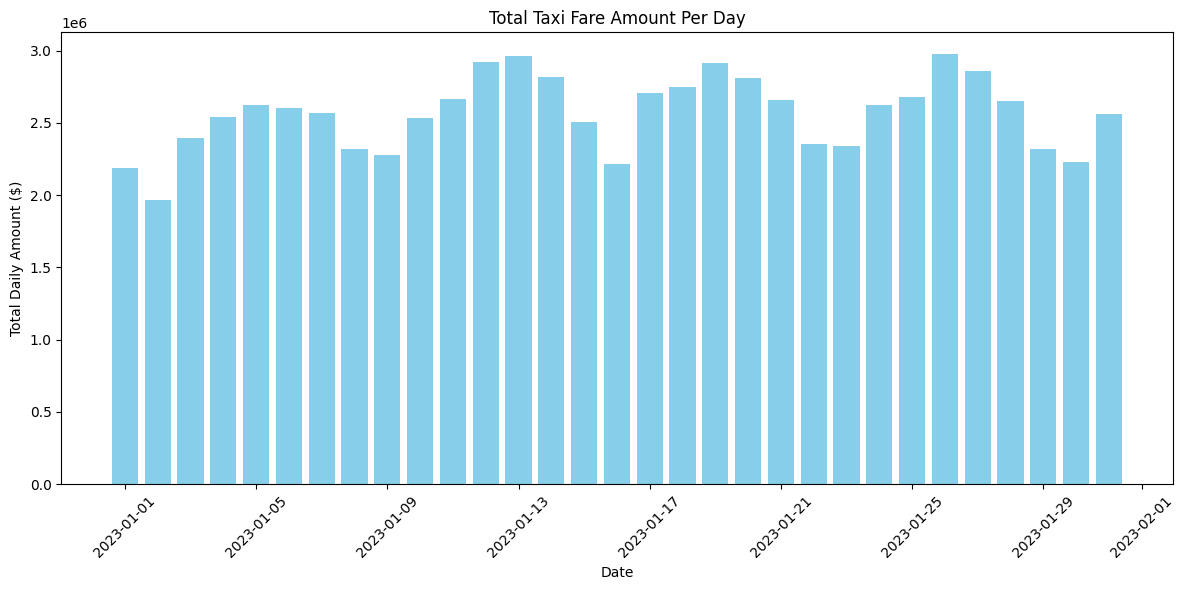

In [79]:
result_pd = result_pd.sort_values(by='pickup_date')


plt.figure(figsize=(12, 6))
plt.bar(result_pd['pickup_date'], result_pd['total_daily_amount'], color='skyblue')
plt.title('Total Taxi Fare Amount Per Day')
plt.xlabel('Date')
plt.ylabel('Total Daily Amount ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
